### Integrantes
    Wilmer Alexander Panqueva Caballero - 20222678006
    Julieth Alejandra Páez Camargo - 20222678004

### Conjunto de datos
### Dataset
    Dataset: https://www.kaggle.com/datasets/checoalejandro/autos-consumo-gasolina-mexico/code?datasetId=8835

El Dataset entregado presenta Indicadores de consumo de gasolina en automoviles hasta modelo 2018
        
        Se debe realizar lo siguiente:

        1. Preprocesamiento de los datos: limpieza, revisión de datos faltantes/anómalos, reducción de datos (seleccionar características relevantes) y transformaciones.
        2. Análisis exploratorio (EDA) de los datos para responder al problema: ¿Qué características hacen que se afecte la salud del hígado?
        3. Visualización de datos, debe entregar un informe para concluir el análisis exploratorio

## Desarrollo / Solution

### Problema a resolver: Calcular de manera precisa el el kilometraje por litro de combustible de vehículos automotores
### Problem to solve: Accurately calculate the mileage per liter of fuel of motor vehicles

### Preprocesamiento de los datos / Data preprocessing

#### Importamos las librerias necesarias para todo el manejo de datos / We import the necessary libraries for all data management

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from math import pi
import ipywidgets as widgets
from IPython.display import display

#### Importamos el Dataset a utilizar / Import Dataset

In [2]:
dataSet = pd.read_csv("Consumo Gasolina Autos Ene 2018.csv")
#Creamos un Data frame usando pandas
df_combustible = pd.DataFrame(dataSet)

#### Descripción de las columnas según el propio DataSet / Description of the columns according to the DataSet itself

    Marca: Alfanumerico marca de vehiculos
    Submarca: Alfanumerico submarca de vehiculos
    Versión Alfanumerico versión del vehiculos
    Modelo: Año del vehiculo
    Trans: 
    Comb: Tipo de combustible
    Cilindros: Nro de cilindros del vehiculo
    Potencia (HP): Caballos de fuerza
    Tamaño (L): Tamaño del tanque en litros
    Categoría: Categorías de autos
    R. Ciudad (km/l): Recorrido en ciudad, kilometro po litro
    R. Carr. (km/l): Recorrido en carretera, kilometro po litro
    R. Comb. (km/l): Recorrido en ciudad, kilometro po litro
    R. Ajust. (km/l): Recorrido en ciudad, kilometro po litro 
    CO2(g/km): Co2 consumido generado
    NOx (g/1000km): Nox generado
    Calificación Gas Ef. Inv: Calificación de gas efecto invernadero
    Calificación Contam. Aire: Contaminanción en el aire

#### Revisamos información relevante / We review relevant information

In [118]:
df_combustible

,Marca,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire
0,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (CVT),2015,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107.0,5.0,10,9
1,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107.0,0.0,10,9
2,FORD,FUSION,HIBRIDO 4X2 4PTAS 2.0L 4CIL 141(+47e)HP E-CVT,2017,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123.0,2.0,10,9
3,FORD,FUSION,HIBRIDO 4PTAS 2.0L 4CIL 188HP AUT eCVT,2018,AUT,Gasolina,4,188,2.0,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123.0,2.0,10,9
4,FORD,FUSION,HYBRID 4PTS 2.5L 4CIL 156HP CVT,2011,CVT,Gasolina,4,156,2.5,AUTOS COMPACTOS,24.00,21.90,23.01,17.26,135.0,5.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,LAND ROVER,RANGE ROVER,SUPERCARGADA 5PTS 5.0L 506HP AUT,2012,AUT,Gasolina,8,506,5.0,CAMIONETAS DE USO MULTIPLE (SUV),4.42,9.60,6.97,5.22,446.0,39.0,0,?
4613,LAND ROVER,RANGE ROVER,SUPERCARGADA 5PTS 5.0L 8CIL 506HP AUT,2013,AUT,Gasolina,8,506,5.0,CAMIONETAS DE USO MULTIPLE (SUV),4.42,9.60,6.97,5.22,446.0,39.0,0,?
4614,MERCEDES,G 65,AMG 4X4 5PTAS 6.0L 12CIL 630HP AUT BITURBO,2016,AUT,Gasolina,12,630,6.0,CAMIONETAS DE USO MULTIPLE (SUV),4.41,7.30,6.45,4.84,482.0,38.0,0,?
4615,MERCEDES,G 65,AMG 5PTAS 6.0L 12CIL 630HP BITURBO AUT,2018,AUT,Gasolina,12,630,6.0,CAMIONETAS DE USO MULTIPLE (SUV),4.41,7.30,6.45,4.84,482.0,38.0,0,?


In [119]:
print("Cantidad de filas y columnas")
print(df_combustible.shape)
print("\n Información general")
print(df_combustible.info())

Cantidad de filas y columnas
(4617, 18)

 Información general
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Marca                      4617 non-null   object 
 1   Submarca                   4617 non-null   object 
 2   Versión                    4617 non-null   object 
 3   Modelo                     4617 non-null   int64  
 4   Trans.                     4601 non-null   object 
 5   Comb.                      4617 non-null   object 
 6   Cilindros                  4617 non-null   int64  
 7   Potencia (HP)              4617 non-null   int64  
 8   Tamaño (L)                 4617 non-null   float64
 9   Categoría                  4617 non-null   object 
 10  R. Ciudad (km/l)           4617 non-null   float64
 11  R. Carr. (km/l)            4617 non-null   float64
 12  R. Comb. (km/l)            4617 non-null  

#### Observamos las columnas para determinar si debemos modificar sus nombres / We look at the columns to determine if we should modify their names

In [120]:
df_combustible.columns

Index(['Marca', 'Submarca', 'Versión', 'Modelo', 'Trans.', 'Comb.',
       'Cilindros', 'Potencia (HP)', 'Tamaño (L)', 'Categoría',
       'R. Ciudad (km/l)', 'R. Carr. (km/l)', 'R. Comb. (km/l)',
       'R. Ajust. (km/l)', 'CO2(g/km)', 'NOx (g/1000km)',
       'Calificación Gas Ef. Inv.', 'Calificación Contam. Aire'],
      dtype='object')

#### Renombramos las columnas / Rename the columns

In [3]:
df_combustible.rename(columns={
    'Trans.': 'Transmisión',
    'Comb.': 'Combustible',
    'Potencia (HP)': 'Potencia',
    'Tamaño (L)': 'Tamaño_motor',
    'R. Ciudad (km/l)': 'Rendimiento_ciudad',
    'R. Carr. (km/l)': 'Rendimiento_carretera',
    'R. Comb. (km/l)': 'Rendimiento_mixto',
    'R. Ajust. (km/l)': 'Rendimiento_ajustado',
    'CO2(g/km)': 'Emisiones_CO2',
    'NOx (g/1000km)': 'Emisiones_NOx',
    'Calificación Gas Ef. Inv.': 'Gas_efecto_invernadero',
    'Calificación Contam. Aire': 'Contaminación del aire'
}, inplace=True)

#### Verificamos valores Duplicado / Verify Duplicate values

In [122]:
df_combustible[df_combustible.duplicated()]

,Marca,Submarca,Versión,Modelo,Transmisión,Combustible,Cilindros,Potencia,Tamaño_motor,Categoría,Rendimiento_ciudad,Rendimiento_carretera,Rendimiento_mixto,Rendimiento_ajustado,Emisiones_CO2,Emisiones_NOx,Gas_efecto_invernadero,Contaminación del aire
91,FIAT,DOBLO,5PTS 1.6L 4CIL 105HP MAN TURBO DIESEL,2012,MAN,Diesel,4,105,1.6,AUTOS COMPACTOS,15.10,20.40,18.47,13.85,194.0,248.0,7,?
93,FIAT,DOBLO,6PTS 1.6L 4CIL 105HP MAN TURBO DIESEL,2013,MAN,Diesel,4,105,1.6,AUTOS COMPACTOS,15.10,20.40,18.47,13.85,194.0,248.0,7,?
364,HONDA,CIVIC,SEDAN 4PTAS 1.5L 4CIL 174HP CVT,2017,NaN,Gasolina,4,174,1.5,AUTOS COMPACTOS,12.80,21.90,17.13,12.85,181.0,10.0,8,9
799,NISSAN,ALTIMA,4PTS 2.5L 4CIL 182HP AUT (CVT),2016,CVT,Gasolina,4,182,2.5,AUTOS DE LUJO,15.00,22.60,19.04,14.28,163.0,6.0,8,9
1068,NISSAN,ALTIMA,4PTS 3.5L 6CIL 270HP AUT (CVT),2016,CVT,Gasolina,6,270,3.5,AUTOS DE LUJO,11.90,18.40,15.54,11.66,200.0,23.0,7,7
1730,CHEVROLET,CORVETTE,CONVERTIBLE 2PTS 6.2L 8CIL 455HP AUT,2015,AUT,Gasolina,8,455,6.2,AUTOS DE LUJO,8.33,16.54,10.73,8.04,290.0,12.0,3,9
2107,MERCEDES,S 600,4PTAS 6.0L 12CIL 530HP TURBO AUT,2018,AUT,Gasolina,12,530,6.0,AUTOS DE LUJO,5.99,11.63,8.90,6.68,349.0,20.0,1,?
2627,CHEVROLET,CORVETTE,COUPE 2PTS 6.2L 8CIL 455HP MAN,2015,MAN,Gasolina,8,455,6.2,AUTOS DEPORTIVOS,9.14,17.04,11.55,8.66,269.0,12.0,4,9
3953,MERCEDES,GLE 400,5PTAS 3.0L 6CIL 333HP TURBO AUT,2018,AUT,Gasolina,6,333,3.0,CAMIONETAS DE USO MULTIPLE (SUV),9.01,13.51,11.95,8.96,260.0,39.0,5,?
4059,CADILLAC,SRX,5PTS 3.6L 6CIL 308HP AUT,2014,AUT,Gasolina,6,308,3.6,CAMIONETAS DE USO MULTIPLE (SUV),8.66,15.02,10.70,8.02,291.0,15.0,3,8


In [5]:
print([x for x in df_combustible.duplicated() if x == True] , '\n\n')
df_combustible.duplicated().sum()

[True, True, True, True, True, True, True, True, True, True, True] 




np.int64(11)

#### Borramos los valores duplicados / Delete duplicate values

In [4]:
df_combustible.drop_duplicates(inplace=True)

In [6]:
df_combustible[df_combustible.duplicated()]

,Marca,Submarca,Versión,Modelo,Transmisión,Combustible,Cilindros,Potencia,Tamaño_motor,Categoría,Rendimiento_ciudad,Rendimiento_carretera,Rendimiento_mixto,Rendimiento_ajustado,Emisiones_CO2,Emisiones_NOx,Gas_efecto_invernadero,Contaminación del aire


#### Verificamos datos no numericos y datos null o faltantes / Verify non-numeric data and null or missing data

In [7]:
df_combustible.isnull().sum()

Marca                      0
Submarca                   0
Versión                    0
Modelo                     0
Transmisión               15
Combustible                0
Cilindros                  0
Potencia                   0
Tamaño_motor               0
Categoría                  0
Rendimiento_ciudad         0
Rendimiento_carretera      0
Rendimiento_mixto          0
Rendimiento_ajustado       0
Emisiones_CO2              0
Emisiones_NOx              0
Gas_efecto_invernadero     0
Contaminación del aire     0
dtype: int64

In [127]:
round(df_combustible.isna().mean() * 100, 2)

Marca                     0.00
Submarca                  0.00
Versión                   0.00
Modelo                    0.00
Transmisión               0.33
Combustible               0.00
Cilindros                 0.00
Potencia                  0.00
Tamaño_motor              0.00
Categoría                 0.00
Rendimiento_ciudad        0.00
Rendimiento_carretera     0.00
Rendimiento_mixto         0.00
Rendimiento_ajustado      0.00
Emisiones_CO2             0.00
Emisiones_NOx             0.00
Gas_efecto_invernadero    0.00
Contaminación del aire    0.00
dtype: float64

#### Eliminamos las filas del dataframe que tienen valores no númericos / Delete dataframe rows that have non-numeric values

In [5]:
df_combustible.dropna(subset=['Transmisión'], inplace=True)
df_combustible.reset_index(drop=True, inplace=True)

In [128]:
round(df_combustible.isna().mean() * 100, 2)

Marca                     0.00
Submarca                  0.00
Versión                   0.00
Modelo                    0.00
Transmisión               0.33
Combustible               0.00
Cilindros                 0.00
Potencia                  0.00
Tamaño_motor              0.00
Categoría                 0.00
Rendimiento_ciudad        0.00
Rendimiento_carretera     0.00
Rendimiento_mixto         0.00
Rendimiento_ajustado      0.00
Emisiones_CO2             0.00
Emisiones_NOx             0.00
Gas_efecto_invernadero    0.00
Contaminación del aire    0.00
dtype: float64

In [129]:
print(df_combustible.isna().sum())
print("\n")
print(df_combustible.isnull().mean() * 100 )
print("\n")

Marca                      0
Submarca                   0
Versión                    0
Modelo                     0
Transmisión               15
Combustible                0
Cilindros                  0
Potencia                   0
Tamaño_motor               0
Categoría                  0
Rendimiento_ciudad         0
Rendimiento_carretera      0
Rendimiento_mixto          0
Rendimiento_ajustado       0
Emisiones_CO2              0
Emisiones_NOx              0
Gas_efecto_invernadero     0
Contaminación del aire     0
dtype: int64


Marca                     0.000000
Submarca                  0.000000
Versión                   0.000000
Modelo                    0.000000
Transmisión               0.325662
Combustible               0.000000
Cilindros                 0.000000
Potencia                  0.000000
Tamaño_motor              0.000000
Categoría                 0.000000
Rendimiento_ciudad        0.000000
Rendimiento_carretera     0.000000
Rendimiento_mixto         0.000000
Rendimie

In [130]:
print(df_combustible.isnull().all())
print("\n")
print(df_combustible.isnull().all(axis = 1))

Marca                     False
Submarca                  False
Versión                   False
Modelo                    False
Transmisión               False
Combustible               False
Cilindros                 False
Potencia                  False
Tamaño_motor              False
Categoría                 False
Rendimiento_ciudad        False
Rendimiento_carretera     False
Rendimiento_mixto         False
Rendimiento_ajustado      False
Emisiones_CO2             False
Emisiones_NOx             False
Gas_efecto_invernadero    False
Contaminación del aire    False
dtype: bool


0       False
1       False
2       False
3       False
4       False
        ...  
4612    False
4613    False
4614    False
4615    False
4616    False
Length: 4606, dtype: bool


#### Comprobamos los valores únicos en cada columna para identificar posibles anomalías / Check the unique values ​​in each column to identify possible anomalies

In [131]:
unique_values = df_combustible.nunique()
unique_values

Marca                       43
Submarca                   544
Versión                   3133
Modelo                       8
Transmisión                 24
Combustible                  2
Cilindros                    7
Potencia                   303
Tamaño_motor                53
Categoría                    5
Rendimiento_ciudad         724
Rendimiento_carretera      754
Rendimiento_mixto         1088
Rendimiento_ajustado       918
Emisiones_CO2              335
Emisiones_NOx              142
Gas_efecto_invernadero      11
Contaminación del aire      10
dtype: int64

#### Descripción estadística de las variables numéricas / Statistical description of numerical variables

In [132]:
df_combustible.describe()

,Modelo,Cilindros,Potencia,Tamaño_motor,Rendimiento_ciudad,Rendimiento_carretera,Rendimiento_mixto,Rendimiento_ajustado,Emisiones_CO2,Emisiones_NOx,Gas_efecto_invernadero
count,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.00000,4606.000000,4606.000000,4606.000000,4606.000000
mean,2014.183891,5.326748,254.868432,2.868758,10.604637,16.611316,13.18221,9.886561,256.558836,30.726878,4.884716
std,2.161415,1.797890,132.735614,1.346649,3.286026,4.187257,3.60292,2.702217,75.612036,56.783587,2.485213
min,2011.000000,3.000000,60.000000,0.900000,3.100000,6.700000,4.96000,3.720000,107.000000,0.000000,0.000000
25%,2012.000000,4.000000,150.000000,1.800000,8.200000,13.465000,10.46000,7.842500,200.000000,10.000000,3.000000
50%,2014.000000,4.000000,220.000000,2.500000,10.420000,16.390000,12.87000,9.650000,243.000000,17.000000,5.000000
75%,2016.000000,6.000000,330.000000,3.600000,12.810000,19.600000,15.60750,11.700000,299.000000,28.000000,7.000000
max,2018.000000,12.000000,888.000000,8.400000,27.460000,31.300000,28.93000,21.700000,627.000000,724.000000,10.000000


#### Validamos la existencia de Outliers / Validate the existence of Outliers

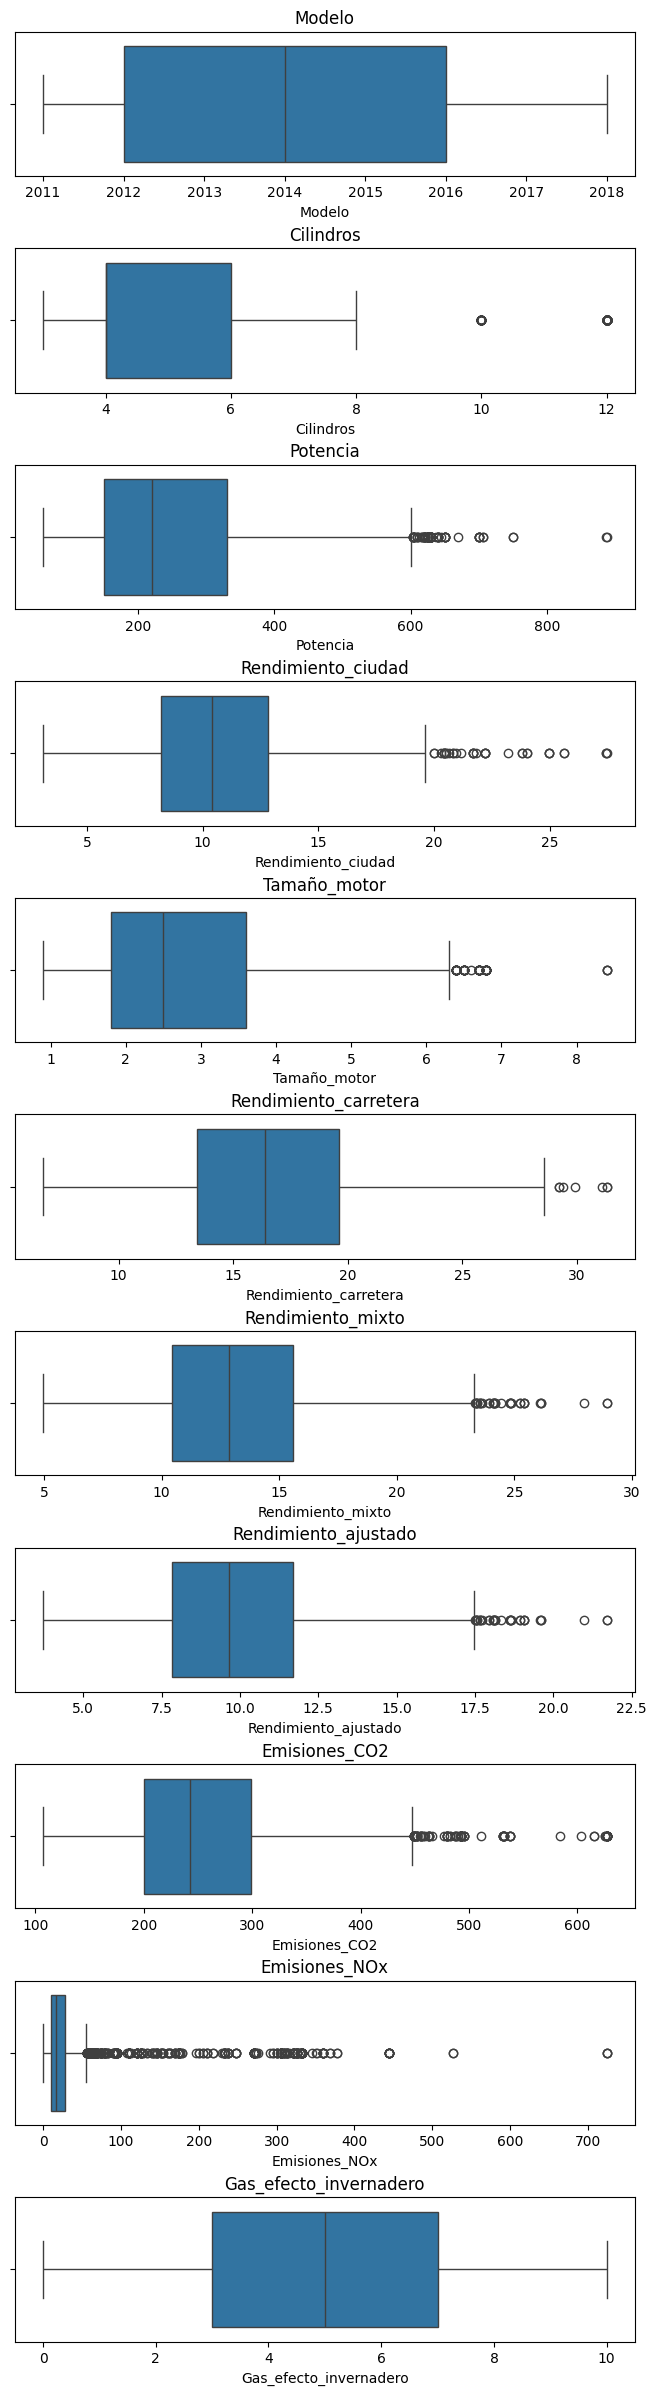

In [9]:
cols_num = ['Modelo','Cilindros', 'Potencia','Rendimiento_ciudad', 'Tamaño_motor',	'Rendimiento_carretera',	'Rendimiento_mixto',  'Rendimiento_ajustado',	'Emisiones_CO2',	'Emisiones_NOx',	'Gas_efecto_invernadero']

fig, ax = plt.subplots(nrows=11,ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_combustible, ax=ax[i])
    ax[i].set_title(col)

In [30]:
def calculate_outlier(col, constant):
    mean = df_combustible[col].mean()
    dev_std = df_combustible[col].std()
    
    lim_sup = mean + (dev_std * constant)
    lim_inf = mean - (dev_std * constant)
    
    print("calculating the limits for: ", col)
    print(f"lim_sup: {lim_sup}")
    print(f"lim_inf: {lim_inf}")
    print(f"mean: {mean}")
    print(f"max: {df_combustible[col].max()}")
    print(f"min: {df_combustible[col].min()}")
    
    print("Total outliers in sup: ", df_combustible[df_combustible[col] > lim_sup].shape[0])
    print("Total outliers in inf: ", df_combustible[df_combustible[col] < lim_inf].shape[0])
    
    df_combustible.boxplot(column=[col])
    plt.show()
    
    plt.hist(df_combustible[col])
    plt.show()
    print("\n")
    
    return lim_inf, lim_sup

calculating the limits for:  Potencia
lim_sup: 321.57499641581137
lim_inf: 188.71818589741017
mean: 255.14659115661075
max: 888
min: 60
Total outliers in sup:  1202
Total outliers in inf:  1956


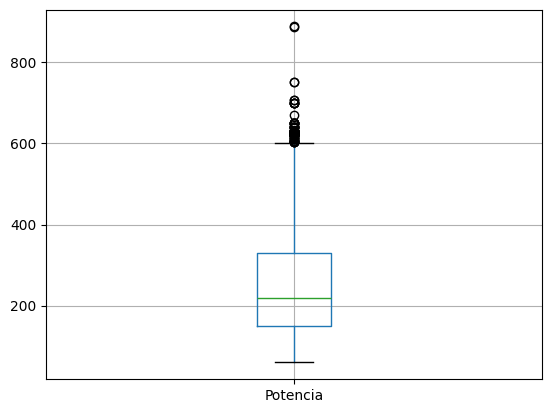

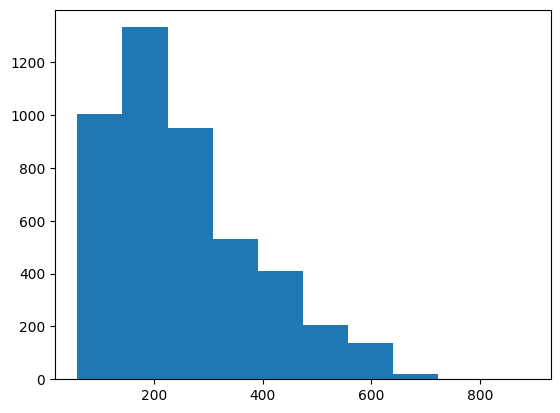

In [77]:
lim_inf, lim_sup = calculate_outlier("Potencia", 0.5)

df = df_combustible[(df_combustible["Potencia"] >= lim_inf) & (df_combustible["Potencia"] <= lim_sup)]

#### Escalamos las columnas relevantes / Scale the relevant columns

In [6]:
scaler = MinMaxScaler()
scaled_columns = ['Rendimiento_ciudad', 'Rendimiento_carretera', 'Rendimiento_mixto', 'Rendimiento_ajustado', 'Emisiones_CO2', 'Emisiones_NOx', 'Gas_efecto_invernadero' ]
df_combustible[scaled_columns] = scaler.fit_transform(df_combustible[scaled_columns])

In [2]:
df_combustible

NameError: name 'df_combustible' is not defined

<Axes: xlabel='Cilindros'>

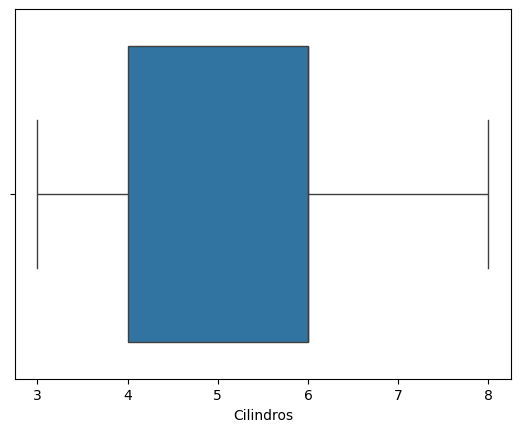

In [138]:
sns.boxplot(x=df['Cilindros'])

In [139]:
df_combustible

,Marca,Submarca,Versión,Modelo,Transmisión,Combustible,Cilindros,Potencia,Tamaño_motor,Categoría,Rendimiento_ciudad,Rendimiento_carretera,Rendimiento_mixto,Rendimiento_ajustado,Emisiones_CO2,Emisiones_NOx,Gas_efecto_invernadero,Contaminación del aire
0,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (CVT),2015,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,0.999179,0.889024,1.000000,1.000000,0.000000,0.006906,1.0,9
1,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,0.999179,0.889024,1.000000,1.000000,0.000000,0.000000,1.0,9
2,FORD,FUSION,HIBRIDO 4X2 4PTAS 2.0L 4CIL 141(+47e)HP E-CVT,2017,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,0.924466,0.734553,0.845640,0.845384,0.030769,0.002762,1.0,9
3,FORD,FUSION,HIBRIDO 4PTAS 2.0L 4CIL 188HP AUT eCVT,2018,AUT,Gasolina,4,188,2.0,AUTOS COMPACTOS,0.924466,0.734553,0.845640,0.845384,0.030769,0.002762,1.0,9
4,FORD,FUSION,HYBRID 4PTS 2.5L 4CIL 156HP CVT,2011,CVT,Gasolina,4,156,2.5,AUTOS COMPACTOS,0.857964,0.617886,0.753025,0.753059,0.053846,0.006906,0.9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,LAND ROVER,RANGE ROVER,SUPERCARGADA 5PTS 5.0L 506HP AUT,2012,AUT,Gasolina,8,506,5.0,CAMIONETAS DE USO MULTIPLE (SUV),0.054187,0.117886,0.083855,0.083426,0.651923,0.053867,0.0,?
4613,LAND ROVER,RANGE ROVER,SUPERCARGADA 5PTS 5.0L 8CIL 506HP AUT,2013,AUT,Gasolina,8,506,5.0,CAMIONETAS DE USO MULTIPLE (SUV),0.054187,0.117886,0.083855,0.083426,0.651923,0.053867,0.0,?
4614,MERCEDES,G 65,AMG 4X4 5PTAS 6.0L 12CIL 630HP AUT BITURBO,2016,AUT,Gasolina,12,630,6.0,CAMIONETAS DE USO MULTIPLE (SUV),0.053777,0.024390,0.062161,0.062291,0.721154,0.052486,0.0,?
4615,MERCEDES,G 65,AMG 5PTAS 6.0L 12CIL 630HP BITURBO AUT,2018,AUT,Gasolina,12,630,6.0,CAMIONETAS DE USO MULTIPLE (SUV),0.053777,0.024390,0.062161,0.062291,0.721154,0.052486,0.0,?


### Seleccionamos caracteristicas relevantes / Select relevant characteristics

In [140]:

df_numerico = df_combustible.select_dtypes(include=['number'])
corr_matrix = df_numerico.corr(numeric_only=True)

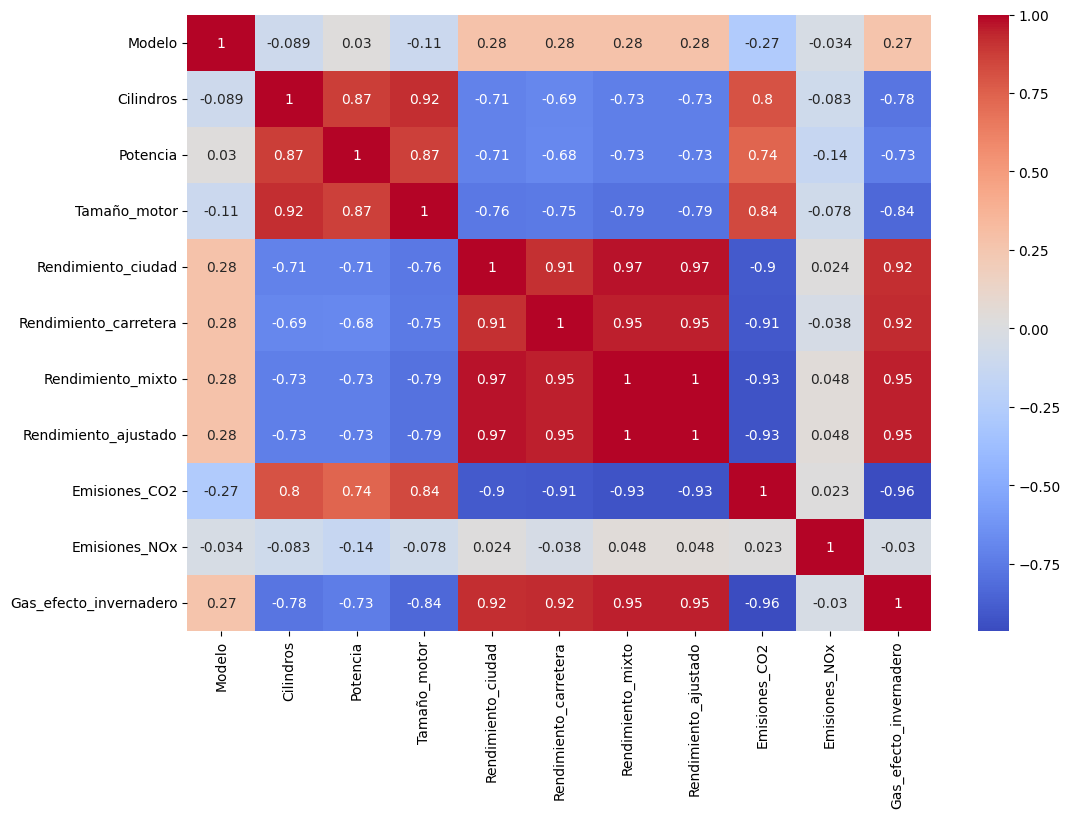

In [141]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [142]:


X = df_numerico.drop('Rendimiento_ciudad', axis=1)
y = df_numerico['Rendimiento_ciudad']

# Inicializar y entrenar el modelo
model = RandomForestRegressor()
model.fit(X, y)

# Obtener la importancia de las características
importances = model.feature_importances_

# Crear un DataFrame con la importancia de las características
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
# Visualizamos la importancia de las caracteristicas
print(feature_importances)

                        Importance
Rendimiento_mixto         0.595405
Rendimiento_ajustado      0.329257
Emisiones_CO2             0.029694
Rendimiento_carretera     0.014019
Potencia                  0.009829
Tamaño_motor              0.008501
Emisiones_NOx             0.008056
Modelo                    0.002761
Gas_efecto_invernadero    0.001604
Cilindros                 0.000874


####  Basado en la matriz de correlación y el método de la importancia de características; Seleccionamos las caracteristicas mas relevantes que dan solución a nuestro problema: / Based on correlation matrix and feature importance method; We select the most relevant characteristics that provide a solution to our problem:

     Rendimiento_mixto
     Rendimiento_ajustado     
     Emisiones_CO2           
     Rendimiento_carretera     

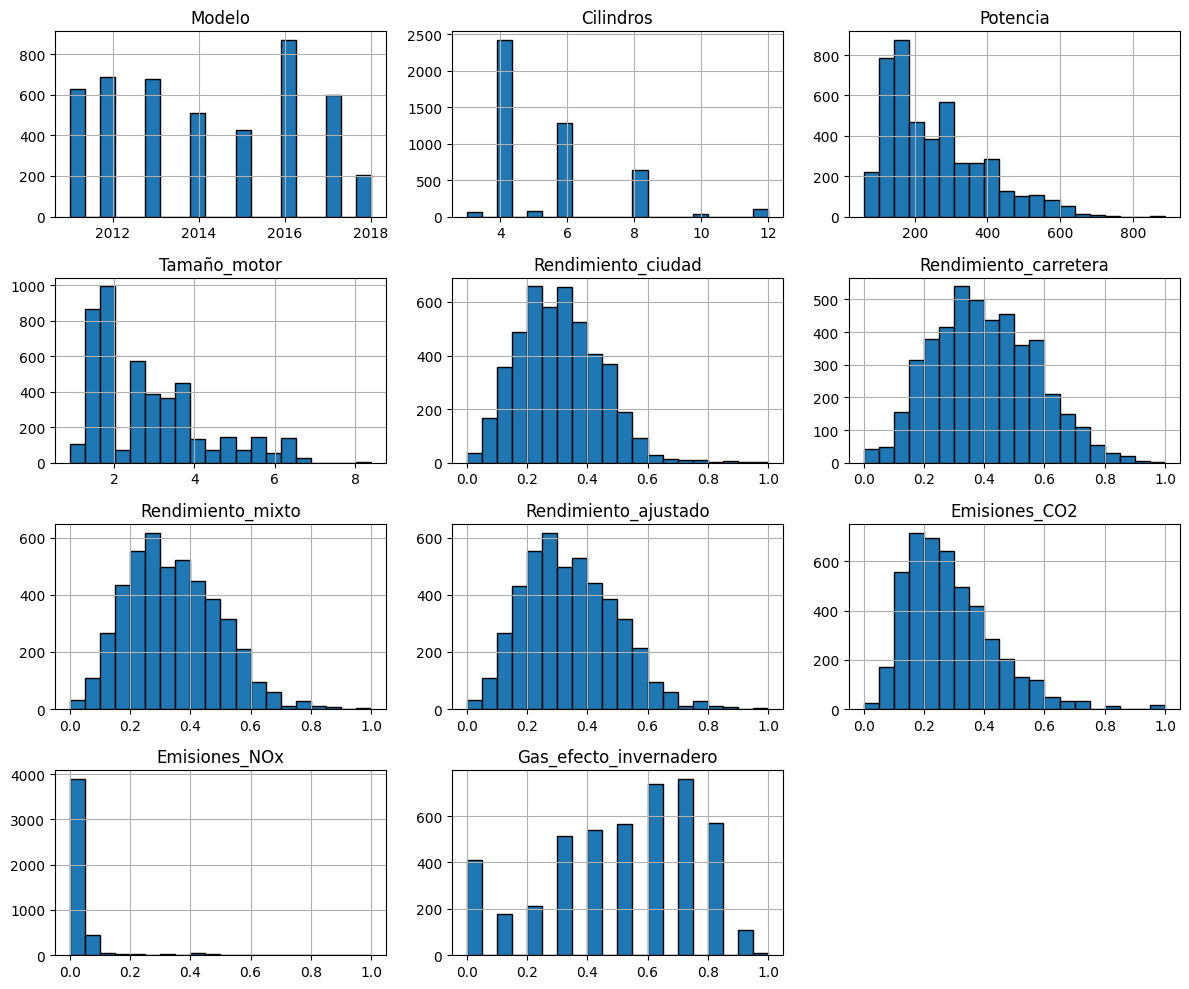

In [143]:
df_combustible.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

### EDA

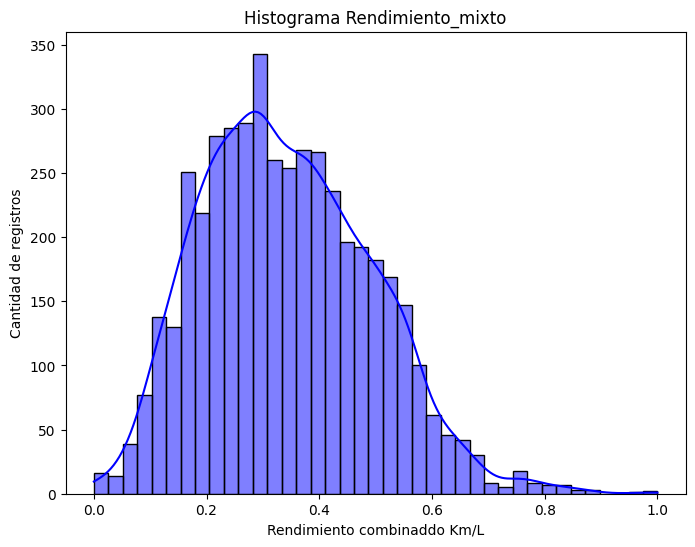

In [100]:
# Crea Histograma de la variable objetivo 'Diagnosis'
plt.figure(figsize=(8, 6))
sns.histplot(df_combustible['Rendimiento_mixto'], kde=True, color='blue')
plt.title(f"Histograma Rendimiento_mixto")
plt.xlabel('Rendimiento combinaddo Km/L')
plt.ylabel('Cantidad de registros')
plt.show()

In [144]:
#Se crea un DataFrame con las columnas que necesitamos, edad, genero y Diagnosttico
df_n = df_combustible[['Tamaño_motor','Combustible','Rendimiento_ciudad']]
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4606 entries, 0 to 4616
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tamaño_motor        4606 non-null   float64
 1   Combustible         4606 non-null   object 
 2   Rendimiento_ciudad  4606 non-null   float64
dtypes: float64(2), object(1)
memory usage: 143.9+ KB


In [145]:
#Se agrupa el DataFrame por 'Combustible' y 'Capacidad_combustible', se calcula la suma de 'Rendimiento_ciudad' para cada grupo y se crea un nuevo DataFrame con los resultados.
df_agg = df_n.groupby(['Combustible','Tamaño_motor']).agg(
                                    {
                                        'Rendimiento_ciudad': 'sum',
                                    }
                                ).reset_index()

#Se muestran las últimas filas del DataFrame para verificar los resultados.
df_agg.tail()

,Combustible,Tamaño_motor,Rendimiento_ciudad
57,Gasolina,6.5,0.246305
58,Gasolina,6.6,0.066092
59,Gasolina,6.7,0.698276
60,Gasolina,6.8,1.430624
61,Gasolina,8.4,0.344828


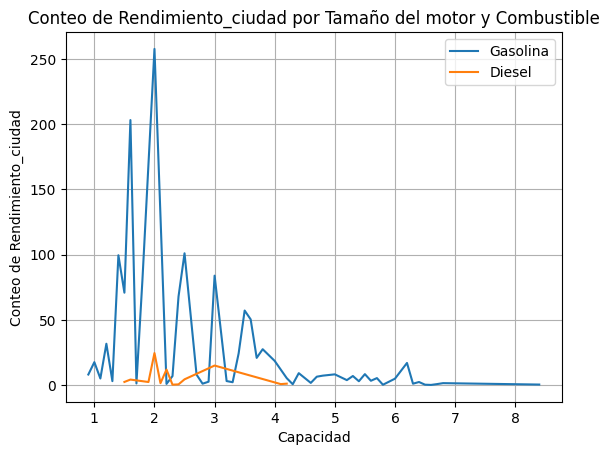

In [147]:
##Grafico de Lineas Combustible, Capacidad_combustible y Rendimiento_ciudad

# Separar datos por Combustible
gas_data = df_agg[df_agg['Combustible'] == 'Gasolina']
diesel_data = df_agg[df_agg['Combustible'] == 'Diesel']

# Extraer la Capacidad_combustible y el conteo de Rendimiento_ciudad para cada grupo de Combustible.
gas_tam = gas_data['Tamaño_motor']
gas_ren = gas_data['Rendimiento_ciudad']
die_tam = diesel_data['Tamaño_motor']
die_ren = diesel_data['Rendimiento_ciudad']

# Crea el gráfico de líneas
plt.plot(gas_tam, gas_ren, label='Gasolina')
plt.plot(die_tam, die_ren, label='Diesel')

# Personalización del gráfico
plt.xlabel('Capacidad')
plt.ylabel('Conteo de Rendimiento_ciudad')
plt.title('Conteo de Rendimiento_ciudad por Tamaño del motor y Combustible')
plt.legend()

# Mostrar Grafica
plt.grid(True)  
plt.show()

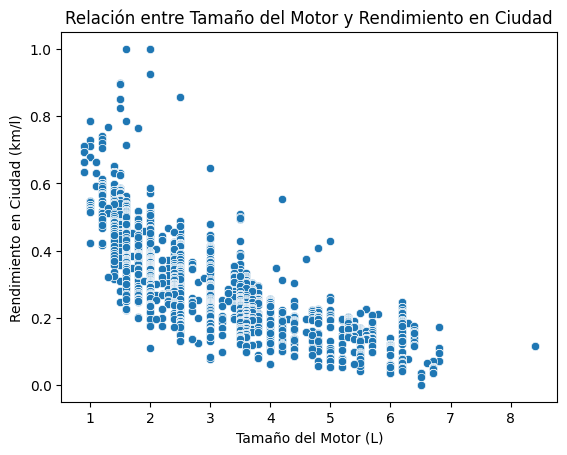

In [11]:
sns.scatterplot(data=df_combustible, x='Tamaño_motor', y='Rendimiento_ciudad')
plt.title('Relación entre Tamaño del Motor y Rendimiento en Ciudad')
plt.xlabel('Tamaño del Motor (L)')
plt.ylabel('Rendimiento en Ciudad (km/l)')
plt.show()

#### Visualizamos la importancia de cada una de las caracteristicas para corroborar nuestra matriz de correlación / Visualize the importance of each of the characteristics to corroborate our correlation matrix

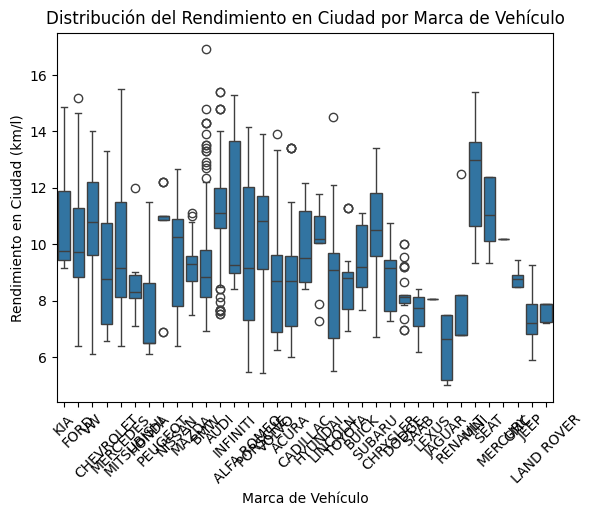

In [153]:
sns.boxplot(data=df, x='Marca', y='Rendimiento_ciudad')
plt.title('Distribución del Rendimiento en Ciudad por Marca de Vehículo')
plt.xlabel('Marca de Vehículo')
plt.ylabel('Rendimiento en Ciudad (km/l)')
plt.xticks(rotation=45)
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_1292\1296673912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances['Importance'], palette="Set2")


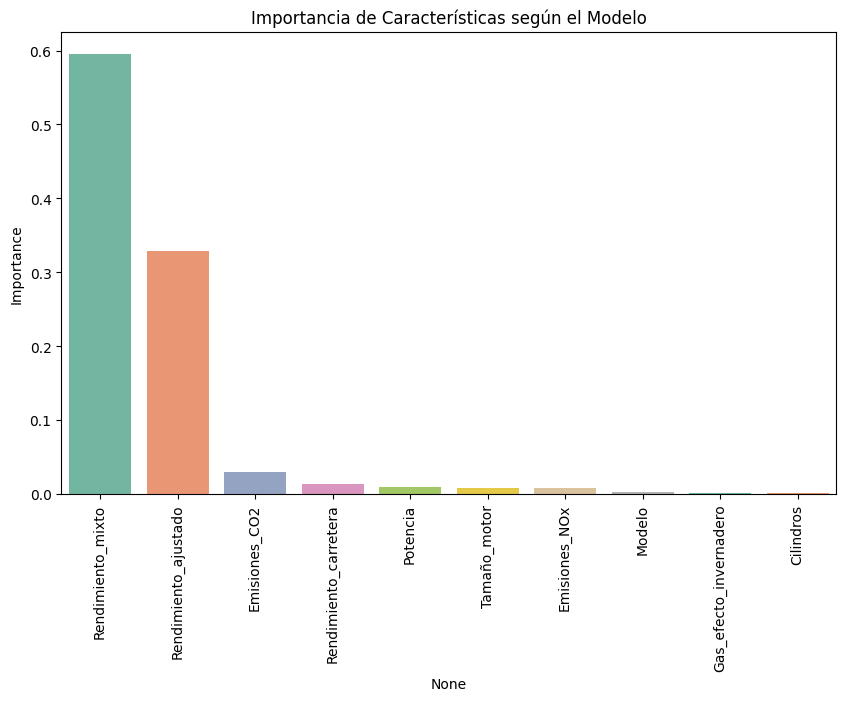

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'], palette="Set2")
plt.title('Importancia de Características según el Modelo')
plt.xticks(rotation=90)
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_1292\4009456205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_combustible['Marca'], y=df_combustible.index, palette="Set2")


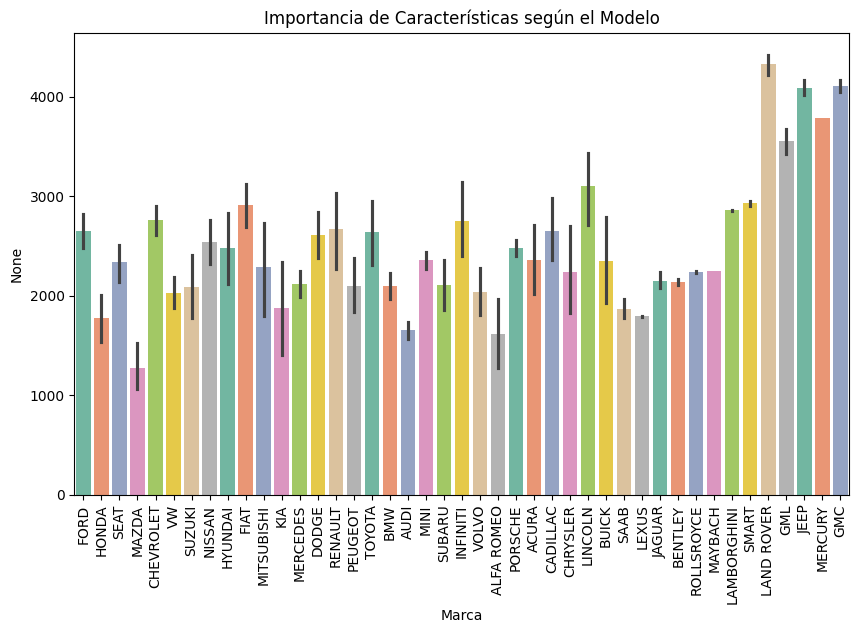

In [155]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_combustible['Marca'], y=df_combustible.index, palette="Set2")
plt.title('Marcas de vehiculos')
plt.xticks(rotation=90)
plt.show()

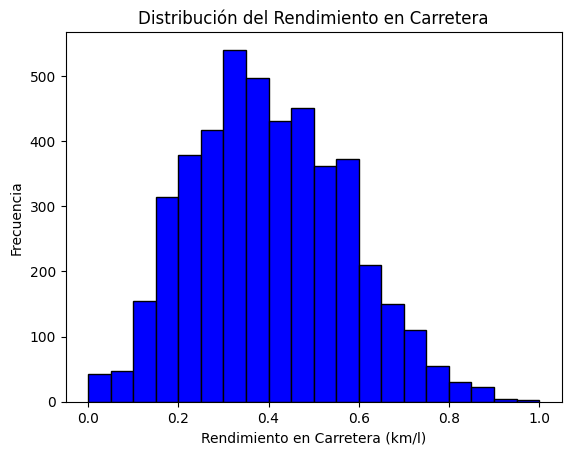

In [7]:
plt.hist(df_combustible['Rendimiento_carretera'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución del Rendimiento en Carretera')
plt.xlabel('Rendimiento en Carretera (km/l)')
plt.ylabel('Frecuencia')
plt.show()

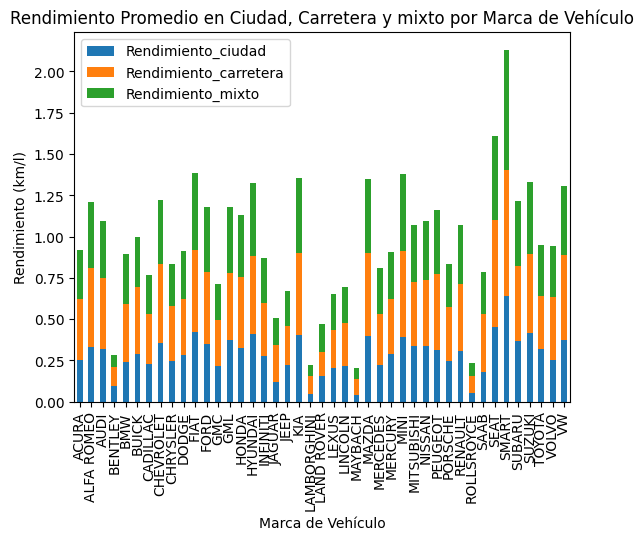

In [10]:
avg_rendimiento = df_combustible.groupby('Marca')[['Rendimiento_ciudad', 'Rendimiento_carretera', 'Rendimiento_mixto']].mean().reset_index()

avg_rendimiento.plot(x='Marca', kind='bar', stacked=True)
plt.title('Rendimiento Promedio en Ciudad, Carretera y mixto por Marca de Vehículo')
plt.xlabel('Marca de Vehículo')
plt.ylabel('Rendimiento (km/l)')
plt.show()

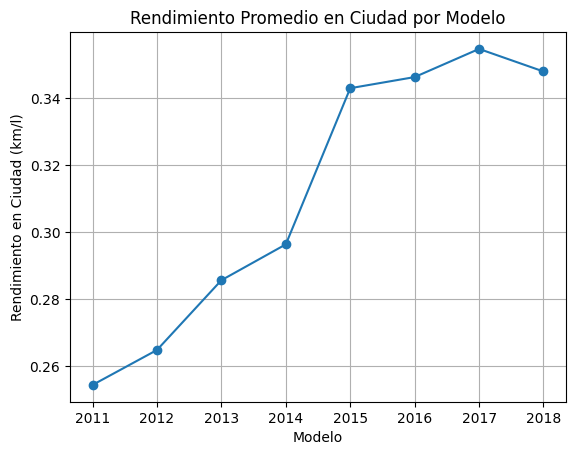

In [8]:
avg_anual = df_combustible.groupby('Modelo')['Rendimiento_ciudad'].mean().reset_index()

plt.plot(avg_anual['Modelo'], avg_anual['Rendimiento_ciudad'], marker='o')
plt.title('Rendimiento Promedio en Ciudad por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Rendimiento en Ciudad (km/l)')
plt.grid()
plt.show()

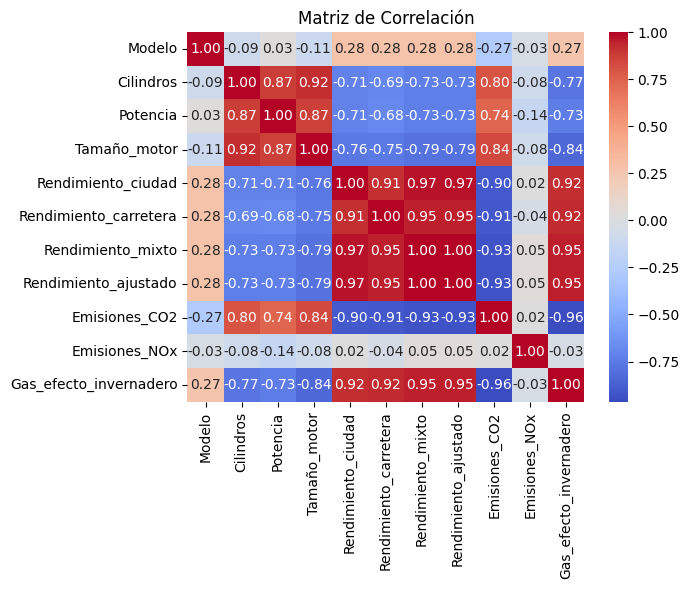

In [9]:
# Calcular la matriz de correlación
correlation_matrix = df_combustible.corr(numeric_only=True)

# Crear un heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

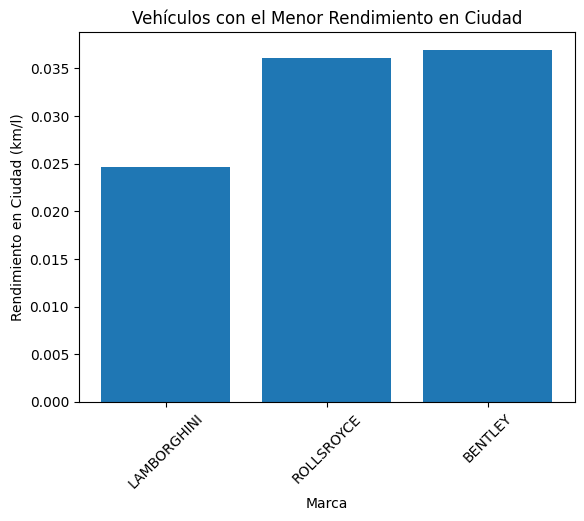

In [10]:
lowest_rendimiento = df_combustible.nsmallest(10, 'Rendimiento_ciudad')

plt.bar(lowest_rendimiento['Marca'], lowest_rendimiento['Rendimiento_ciudad'])
plt.title('Vehículos con el Menor Rendimiento en Ciudad')
plt.xlabel('Marca')
plt.ylabel('Rendimiento en Ciudad (km/l)')
plt.xticks(rotation=45)
plt.show()

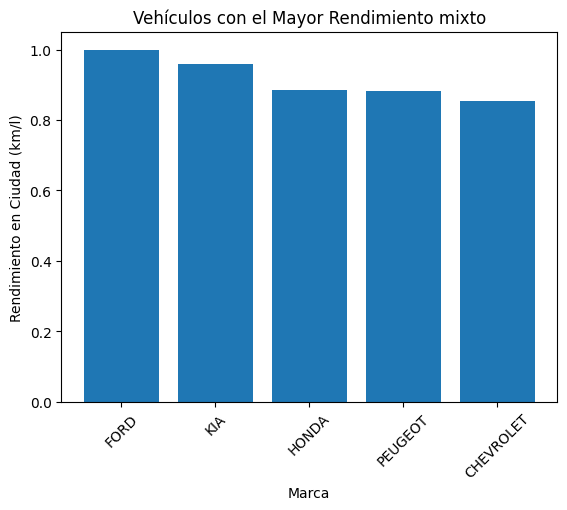

In [13]:
highest_rendimiento = df_combustible.nlargest(10, 'Rendimiento_mixto')

plt.bar(highest_rendimiento['Marca'], highest_rendimiento['Rendimiento_mixto'])
plt.title('Vehículos con el Mayor Rendimiento mixto')
plt.xlabel('Marca')
plt.ylabel('Rendimiento en Ciudad (km/l)')
plt.xticks(rotation=45)
plt.show()

([<matplotlib.projections.polar.ThetaTick at 0x2366e56c230>,
 [Text(0.0, 0, 'Rendimiento_ciudad'),
  Text(1.5707963267948966, 0, 'Rendimiento_carretera'),
  Text(3.141592653589793, 0, 'Emisiones_CO2'),
  Text(4.71238898038469, 0, 'Tamaño_motor')])

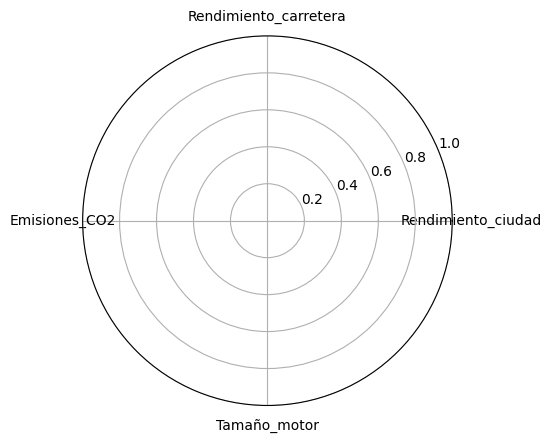

In [15]:
# Seleccionar las columnas que quieres comparar
categories = ['Rendimiento_ciudad', 'Rendimiento_carretera', 'Emisiones_CO2', 'Tamaño_motor']
values = df_combustible.groupby('Modelo')[categories].mean().reset_index()

# Crear un gráfico de radar
num_vars = len(categories)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
values = values.mean().drop('Modelo').values.flatten().tolist()

values += values[:1]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)